In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("titanic_train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 데이터 설명
- PassengerID : 고객번호
- Survived : 생존여부(0 = 사망, 1 = 생존)
- Name : 승객의 이름
- Sex : 성별(0 = male, 1 = female)
- Age : 승객의 나이
- SibSp : 타이타닉에 탑승한 형제/배우자의 수
- Parch : 타이타닉에 탑승한 부모/자녀의 수
- Ticket : 티켓 번호
- Fare : 승객 요금
- Cabin : 객실 번호
- Embarked : 기항지 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
sex_num = {"Sex" : {"male":0, "female":1}}

In [6]:
em_num = {"Embarked" : {"C":1,"S":2,"Q":3}}

In [7]:
df1 = df.replace(sex_num)
df1 = df1.replace(em_num)

In [8]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,2.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1.0


In [9]:
df1.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.017487
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.126753
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.307324
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.023175
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.042340
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.031095
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.035756
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.269588
Embarked,-0.017487,-0.126753,0.307324,-0.023175,-0.042340,0.031095,-0.035756,-0.269588,1.000000


- 상관계수를 확인하면 sex와 pclass, fare, embarked가 생존과 비교적 높은 상관관계를 갖고있음

In [51]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
dtype: object

In [52]:
df_fill = df1.select_dtypes(include=["float64", "int64"])

In [53]:
df_fill

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,2.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
4,5,0,3,0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,2.0
887,888,1,1,1,19.0,0,0,30.0000,2.0
888,889,0,3,1,NaN,1,2,23.4500,2.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


In [86]:
df_fill.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.017487
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.126753
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.307324
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.023175
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.042340
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.031095
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.035756
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.269588
Embarked,-0.017487,-0.126753,0.307324,-0.023175,-0.042340,0.031095,-0.035756,-0.269588,1.000000


### 결측값을 maen으로 채웠을 경우 correlation

In [61]:
df2 = df_fill.copy()

In [62]:
df2 = df2.fillna(round(df_fill.mean()))

In [63]:
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,2.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
4,5,0,3,0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,2.0
887,888,1,1,1,19.0,0,0,30.0000,2.0
888,889,0,3,1,30.0,1,2,23.4500,2.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


In [13]:
df2.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033019,-0.057527,-0.001652,0.012658,-0.017487
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.070657,-0.035322,0.081629,0.257307,-0.126753
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.329727,0.083081,0.018443,-0.549500,0.307324
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084660,0.114631,0.245489,0.182333,-0.023175
Age,0.033019,-0.070657,-0.329727,-0.084660,1.000000,-0.232440,-0.180330,0.090632,-0.031266
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232440,1.000000,0.414838,0.159651,0.031095
Parch,-0.001652,0.081629,0.018443,0.245489,-0.180330,0.414838,1.000000,0.216225,-0.035756
Fare,0.012658,0.257307,-0.549500,0.182333,0.090632,0.159651,0.216225,1.000000,-0.269588
Embarked,-0.017487,-0.126753,0.307324,-0.023175,-0.031266,0.031095,-0.035756,-0.269588,1.000000


### 결측값을 median으로 채웠을 경우 correlation

In [65]:
df3 = df_fill.copy()

In [68]:
df3 = df3.fillna(df_fill.median())

In [70]:
df3

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,2.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
4,5,0,3,0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,2.0
887,888,1,1,1,19.0,0,0,30.0000,2.0
888,889,0,3,1,28.0,1,2,23.4500,2.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


In [69]:
df3.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.017443
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.125953
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.305762
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,-0.022521
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.040166
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,0.030874
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.035957
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,-0.268865
Embarked,-0.017443,-0.125953,0.305762,-0.022521,-0.040166,0.030874,-0.035957,-0.268865,1.000000


### 결측값을 mode로 채웠을 경우 correlation

In [71]:
df4 = df_fill.copy()

In [72]:
df4 = df4.fillna(df_fill.mode())

In [73]:
df4

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,2.0
3,4,1,1,1,35.0,1,0,53.1000,2.0
4,5,0,3,0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,2.0
887,888,1,1,1,19.0,0,0,30.0000,2.0
888,889,0,3,1,NaN,1,2,23.4500,2.0
889,890,1,1,0,26.0,0,0,30.0000,1.0


In [74]:
df4.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.017487
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.126753
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.307324
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,-0.023175
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.042340
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.031095
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.035756
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,-0.269588
Embarked,-0.017487,-0.126753,0.307324,-0.023175,-0.042340,0.031095,-0.035756,-0.269588,1.000000


In [20]:
high_feature = ["Sex", "Pclass", "Fare", "Embarked"]

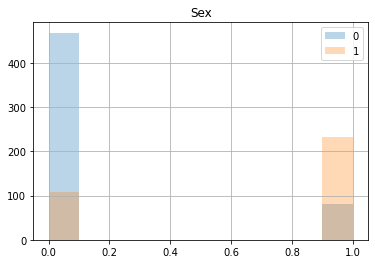

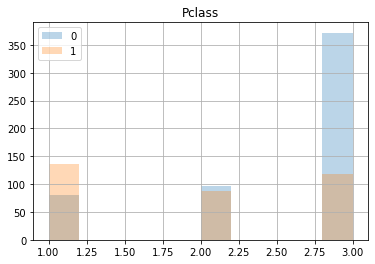

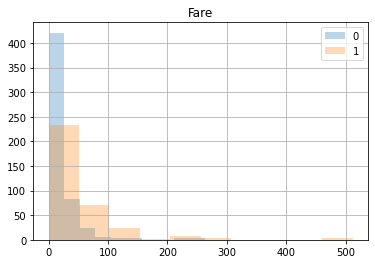

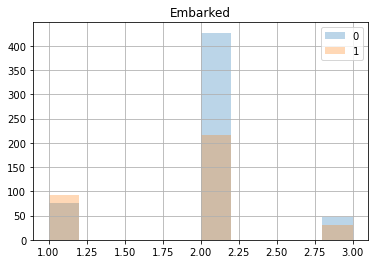

In [75]:
for feature_nm in high_feature : 
    plt.title(feature_nm)
    for cls in df_fill.Survived.unique() : 
        vec = df_fill.loc[df.Survived == cls, feature_nm].values
        plt.hist(vec, alpha=.3, label=cls)
    plt.legend()
    plt.grid()
    plt.show()

- 여성일 경우 남성보다 생존할 확률이 높음
- 1등석 승객의 경우 생존할 확률이 더 죽었을 확률보다 높음
- 승객 요금이 높을수록 생존 확률이 높음
- 기항지 위치가 C일 경우 생존 가능성이 높음

In [85]:
df1.loc[(df1.Sex == 1) & (df1.Fare >= 50) & (df1.Pclass == 1) & (df1.Embarked == 1)].Survived.value_counts(normalize=True)

1    1.0
Name: Survived, dtype: float64

### Rule 1
- 여성이면서 Cherbourg에서 탑승한 요금이 50 이상 1등석 승객은 전원 생존

In [84]:
df_fill.loc[(df_fill.Sex == 0) & (df_fill.Fare <= 50) & (df_fill.Pclass == 3) & (df_fill.Embarked == 2)].Survived.value_counts(normalize=True) 

0    0.885827
1    0.114173
Name: Survived, dtype: float64

In [23]:
df_num.Fare.mean()

32.2042079685746

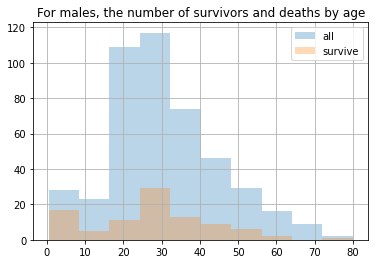

In [24]:
plt.title("For males, the number of survivors and deaths by age")
plt.hist(df_fill.loc[(df_fill.Sex == 0), "Age"].values, alpha= 0.3, label="all")
plt.hist(df_fill.loc[(df_fill.Sex == 0) & (df_fill.Survived == 1), "Age"].values, alpha= 0.3, label="survive")
plt.legend()
plt.grid()
plt.show()

In [25]:
len(df_fill.loc[(df_fill.Sex == 0) & (df_fill.Survived == 1), "Age"].values)/len(df_fill.loc[(df_fill.Sex == 0), "Age"].values) * 100

18.890814558058924

- 남성의 경우 데이터의 약 18.89% 가 생존
- 남성의 경우 10세 미만의 경우 가장 높은 생존률을 보여줌

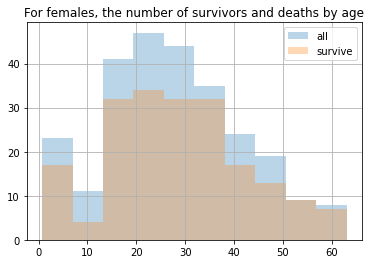

In [26]:
plt.title("For females, the number of survivors and deaths by age")
plt.hist(df_fill.loc[(df_fill.Sex == 1), "Age"].values, alpha= 0.3, label="all")
plt.hist(df_fill.loc[(df_fill.Sex == 1) & (df_fill.Survived == 1), "Age"].values, alpha= 0.3, label="survive")
plt.legend()
plt.grid()
plt.show()

In [27]:
len(df_fill.loc[(df_fill.Sex == 1) & (df_fill.Survived == 1), "Age"].values)/len(df_fill.loc[(df_fill.Sex == 1), "Age"].values) * 100

74.20382165605095

- 여성의 경우 데이터의 약 74.2% 가 생존
- 여성의 경우 50세 이상 60세 미만의 나이대가 가장 높은 생존률을 보여줌

In [87]:
df_fill.loc[(df1.Sex == 1) & (df1.Age >= 50) & (df1.Age < 60)].Survived.value_counts(normalize=True)

1    0.888889
0    0.111111
Name: Survived, dtype: float64